In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('time-series-19-covid-combined.csv', parse_dates=True)

In [3]:
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32307 entries, 0 to 32306
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            32307 non-null  object 
 1   Country/Region  32307 non-null  object 
 2   Province/State  9922 non-null   object 
 3   Lat             32307 non-null  float64
 4   Long            32307 non-null  float64
 5   Confirmed       32186 non-null  float64
 6   Recovered       30613 non-null  float64
 7   Deaths          32186 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.0+ MB


In [5]:
#data cleaning
data.drop(columns=['Province/State','Lat', 'Long'], inplace=True)

In [6]:
# data.reset_index()

In [7]:
df = data.groupby(["Date"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [8]:
# df =df.set_index('Date')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       121 non-null    object 
 1   Confirmed  121 non-null    float64
 2   Deaths     121 non-null    float64
 3   Recovered  121 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.9+ KB


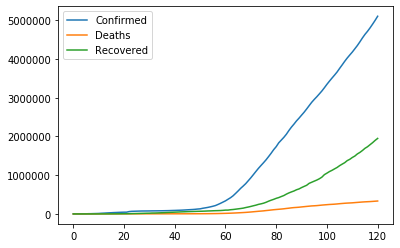

In [10]:
#plotting the data
fig, ax = plt.subplots()
df.plot(ax=ax)
plt.show()

In [11]:
recovered = df[['Date', 'Recovered']]
for index, row in recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0
        
death = df[['Date', 'Deaths']]
for index, row in death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0
        
confirmed = df[['Date', 'Confirmed']]
for index, row in confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

In [12]:
df.shape

(121, 3)

In [12]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adfuller_test(dataframe, feature):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dataframe[feature], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)    

In [15]:
# adfuller test for Recovered
adfuller_test(recovered, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                   1.043199
p-value                          0.994701
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [16]:
# adfuller test for Confirmed
adfuller_test(confirmed, 'Confirmed')

Results of Dickey-Fuller Test:
Test Statistic                   1.492390
p-value                          0.997496
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [17]:
# adfuller test for Deaths
adfuller_test(death, 'Deaths')

Results of Dickey-Fuller Test:
Test Statistic                   0.346969
p-value                          0.979400
#Lags Used                       9.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64


In [24]:
df = df.set_index('Date')

In [26]:
df_stationary = df.diff().dropna()

In [27]:
df_stationary.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-23,99.0,1.0,2.0
2020-01-24,287.0,8.0,6.0
2020-01-25,493.0,16.0,3.0
2020-01-26,684.0,14.0,13.0
2020-01-27,809.0,26.0,9.0


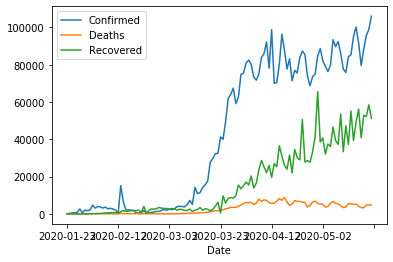

In [28]:
#plotting the data
fig, ax = plt.subplots()
df_stationary.plot(ax=ax)
plt.show()

In [31]:
# adfuller test for Recovered
adfuller_test(df_stationary, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                   1.240600
p-value                          0.996255
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [34]:
df_stationary_2nd = df.diff().diff().dropna()

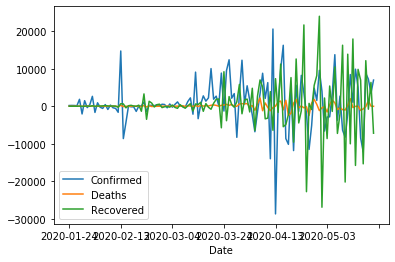

In [35]:
#plotting the data
fig, ax = plt.subplots()
df_stationary_2nd.plot(ax=ax)
plt.show()

In [32]:
# adfuller test for Recovered
adfuller_test(df_stationary_2nd, 'Recovered')

Results of Dickey-Fuller Test:
Test Statistic                  -1.896556
p-value                          0.333683
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [45]:
df_stationary_2nd.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-24,188.0,7.0,4.0
2020-01-25,206.0,8.0,-3.0
2020-01-26,191.0,-2.0,10.0
2020-01-27,125.0,12.0,-4.0
2020-01-28,1842.0,23.0,37.0


In [42]:
# Train-Test split
df_train = df_stationary_2nd.loc[:'2020-03-31']
df_test = df_stationary_2nd.loc['2020-03-31':]

In [23]:
df_train.shape, df_test.shape

((70, 3), (52, 3))

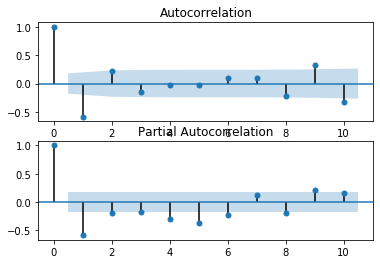

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(df_stationary_2nd["Recovered"], ax= plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(df_stationary_2nd["Recovered"], ax=plt.gca(), lags = 10)
plt.show()

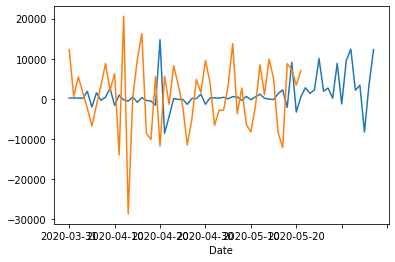

In [46]:
#plotting the data
df_train['Confirmed'].plot()
df_test['Confirmed'].plot()

In [44]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error